In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling

In [2]:
#pip install pandas_profiling

In [3]:
df=pd.read_csv('date-hour-soo-dest-2022.csv',header=None)

In [4]:
df

,0,1,2,3,4
0,2022-01-01,0,12TH,12TH,1
1,2022-01-01,0,12TH,16TH,1
2,2022-01-01,0,12TH,24TH,2
3,2022-01-01,0,12TH,ASHB,1
4,2022-01-01,0,12TH,MONT,1
...,...,...,...,...,...
4717204,2022-08-02,23,WOAK,MCAR,1
4717205,2022-08-02,23,WOAK,MONT,1
4717206,2022-08-02,23,WOAK,NBRK,1
4717207,2022-08-02,23,WOAK,POWL,2


In [5]:
df.columns= ["Date", "Hour", "Origin Station", "Destination Station",'Trip Count']

In [6]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
df['Date']=pd.to_datetime(df['Date'])

In [8]:
df['day']=df['Date'].dt.dayofweek
df['month']=df['Date'].dt.month
df['year']=df['Date'].dt.year
df['weekday']=df['Date'].dt.day_name()
df['month_name']=df['Date'].dt.month_name()

In [9]:
df=df.drop('Date',axis=1)
df.head()

,Hour,Origin Station,Destination Station,Trip Count,day,month,year,weekday,month_name
0,0,12TH,12TH,1,5,1,2022,Saturday,January
1,0,12TH,16TH,1,5,1,2022,Saturday,January
2,0,12TH,24TH,2,5,1,2022,Saturday,January
3,0,12TH,ASHB,1,5,1,2022,Saturday,January
4,0,12TH,MONT,1,5,1,2022,Saturday,January


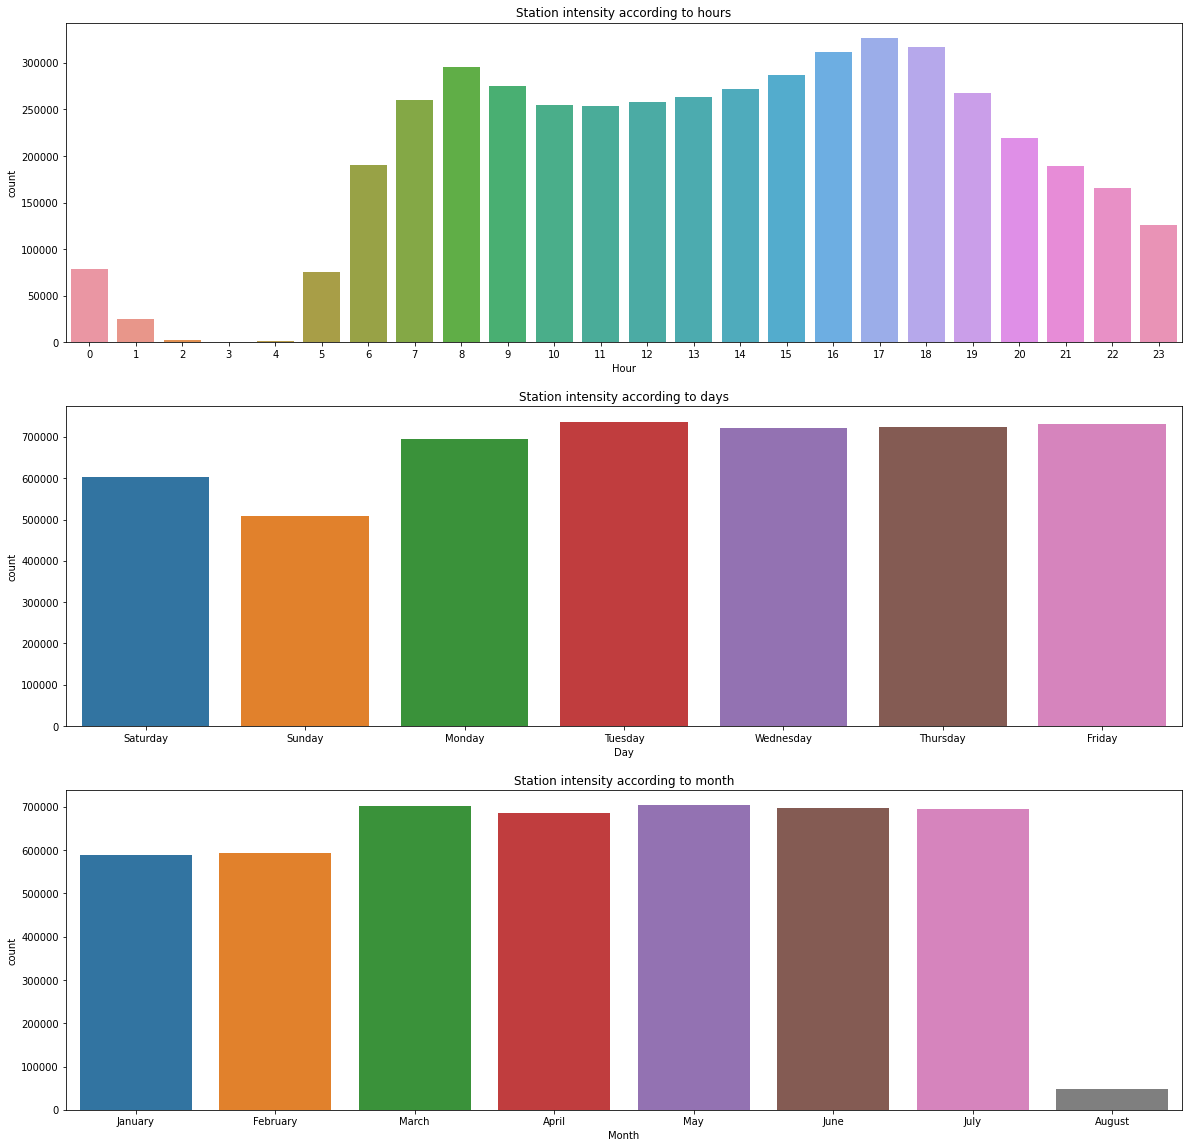

In [10]:
fig=plt.figure(figsize=(20,20))

ax=fig.add_subplot(3,1,1)
ax=sns.countplot(df['Hour'])
ax.set_title('Station intensity according to hours')
ax.set_xlabel('Hour')

bx=fig.add_subplot(3,1,2)
bx=sns.countplot(df['weekday'])
bx.set_title('Station intensity according to days')
bx.set_xlabel('Day')

cx=fig.add_subplot(3,1,3)
cx=sns.countplot(df['month_name'])
cx.set_title('Station intensity according to month')
cx.set_xlabel('Month');

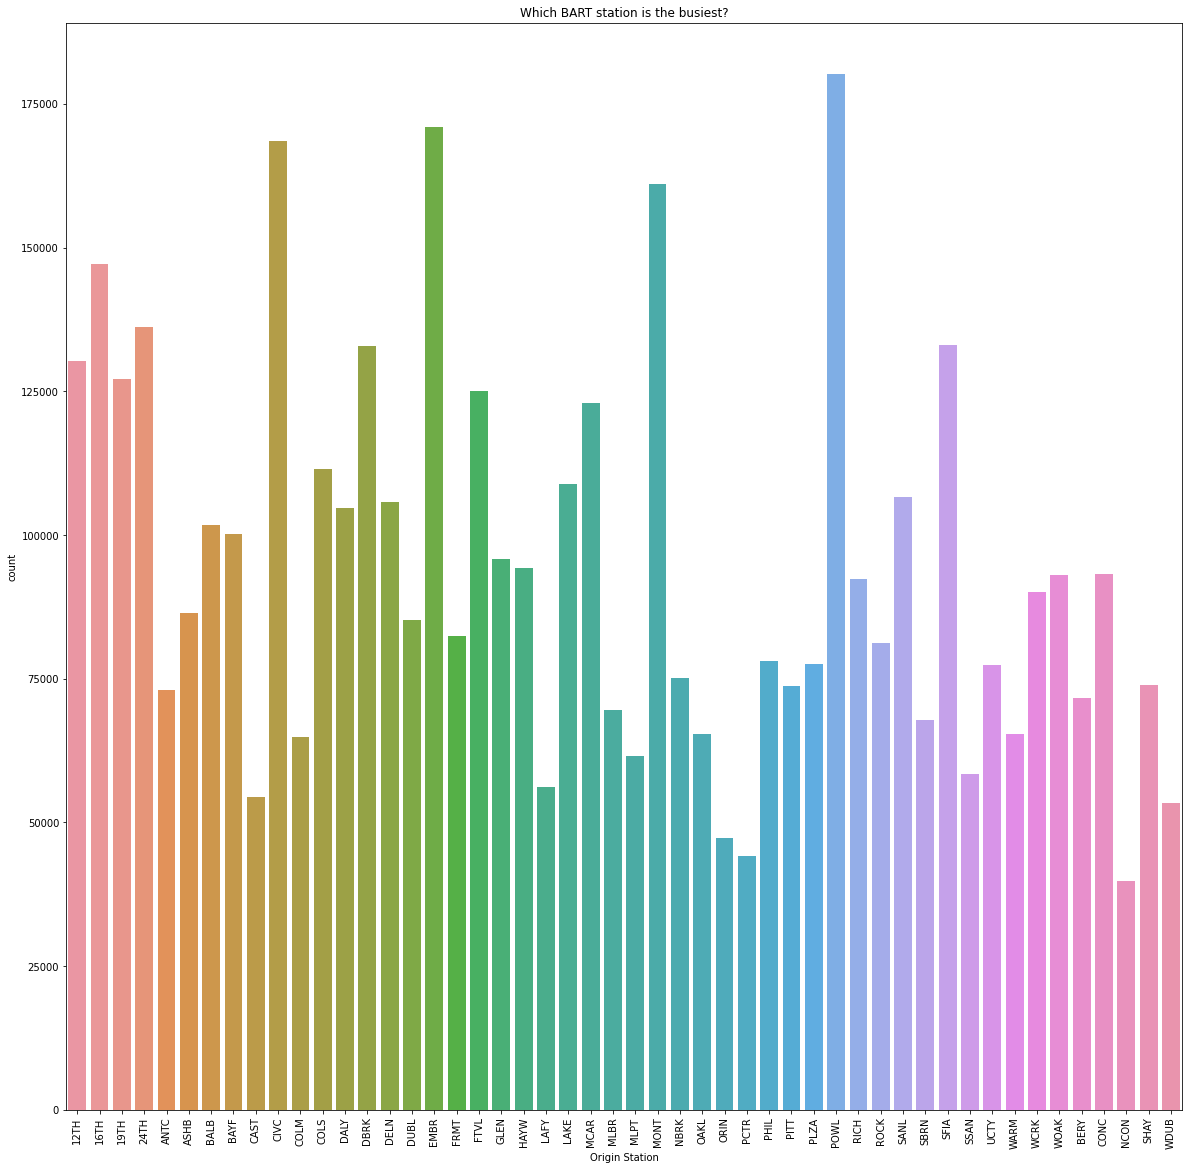

In [11]:
fig=plt.figure(figsize=(20,20))

ax=sns.countplot(df['Origin Station'],)
ax.set_title('Which BART station is the busiest?')
ax.set_xlabel('Origin Station')
plt.xticks(rotation=90);

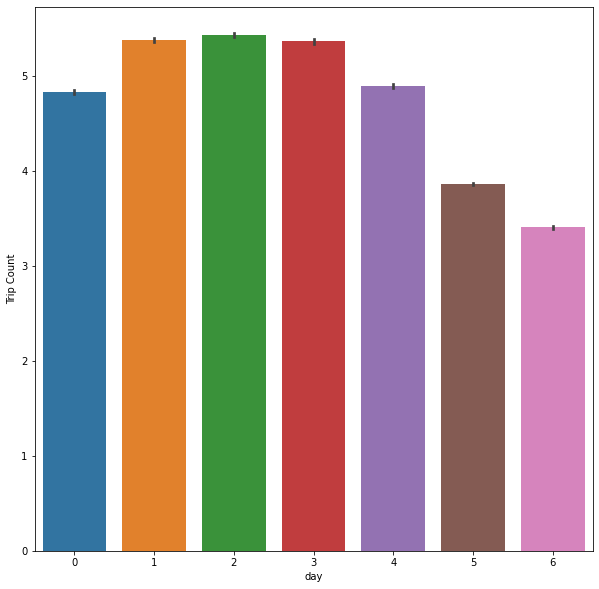

In [12]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['day'],y=df['Trip Count']);

In [13]:
x=df[['day']]
y=df['Trip Count']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [17]:
lr=LinearRegression()
pred=lr.fit(x_train,y_train).predict(x_test)

In [18]:
mean_squared_error(y_test,pred)**.5

8.723317433154119

In [19]:
r2_score(y_test,pred)

0.003349117411897584

In [23]:
#from pycaret.regression import *
#exp_name=setup(data=x,target='Trip Count')
#best_model=compare_models(sort='R2')